In [1]:
import numpy as np
import pandas as pd

# Set random seed
np.random.seed(42)

# Define total number of products
number_of_products = 10

# Create data dictionary
data = {'product_id':np.arange(1, number_of_products+1).tolist(),
       'measure':np.round(np.random.normal(loc=10, scale=0.5, size=number_of_products),3)}

# Transform dictionary into a data frame
df = pd.DataFrame(data)

# View data frame
df

,product_id,measure
0,1,10.248
1,2,9.931
2,3,10.324
3,4,10.762
4,5,9.883
5,6,9.883
6,7,10.790
7,8,10.384
8,9,9.765
9,10,10.271


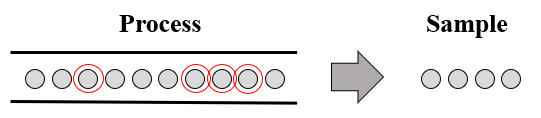

In [4]:
simple_random_sample = df.sample(n=4).sort_values(by='product_id')

In [5]:
simple_random_sample

,product_id,measure
1,2,9.931
4,5,9.883
5,6,9.883
8,9,9.765


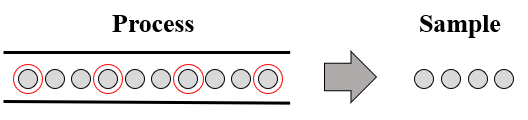

In [4]:
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 3)

In [5]:
systematic_sample 

,product_id,measure
0,1,10.248
3,4,10.762
6,7,10.790
9,10,10.271


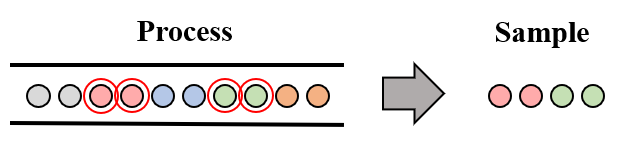

In [6]:
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)

        # Create an empty list
        indices = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indices.append(i)
        cluster_sample = df.iloc[indices]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")
        
# Obtain a cluster sample and save it in a new variable
cluster_sample = cluster_sampling(df,5)

In [7]:
cluster_sample

,product_id,measure,cluster_id
2,3,10.324,2
3,4,10.762,2
6,7,10.790,4
7,8,10.384,4


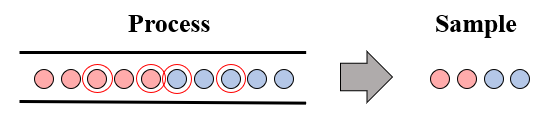

In [6]:
data = {'product_id':np.arange(1, number_of_products+1).tolist(),
       'product_strata':np.repeat([1,2], number_of_products/2).tolist(),
       'measure':np.round(np.random.normal(loc=10, scale=0.5, size=number_of_products),3)}

# Transform dictionary into a data frame
df = pd.DataFrame(data)

# View data frame
df

,product_id,product_strata,measure
0,1,1,8.780
1,2,1,10.302
2,3,1,9.874
3,4,1,9.918
4,5,1,9.262
5,6,2,10.743
6,7,2,9.988
7,8,2,10.178
8,9,2,10.209
9,10,2,10.416


In [9]:
# Import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=4)

# Perform data frame split
for x, y in split.split(df, df['product_strata']):
    stratified_random_sample = df.iloc[y].sort_values(by='product_id')

# View sampled data frame
stratified_random_sample

,product_id,product_strata,measure
0,1,1,8.780
2,3,1,9.874
5,6,2,10.743
8,9,2,10.209


In [9]:
list = ['1', '2', '3', '4', '5']
print (list[12:])


[]
